Y:
 [[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [ 4.    6.25  5.    2.    2.5   1.  ]
 [ 0.    4.    0.    0.    2.    1.  ]
 [ 4.    9.    6.    2.    3.    1.  ]]
Normalized Y: 
 [[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]
Case 1: Initial Weight Vector All One :
   Learning Rate  One At a Time  Many At a Time
0            0.1              6              84
1            0.2             92              68
2            0.3            104              92
3            0.4            106              94
4            0.5             93              74
5            0.6             93              73
6            0.7            108              73
7            0.8            115              73
8            0.9             94       

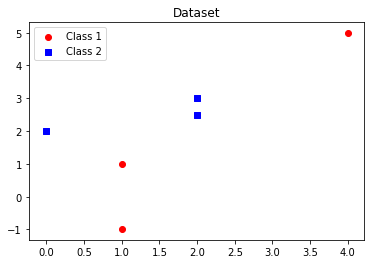

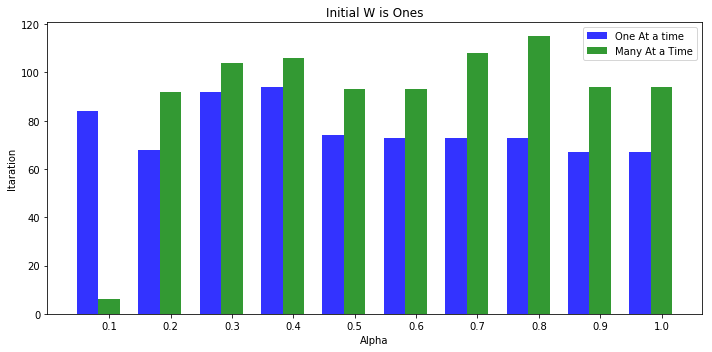

Case 2: Initial Weight Vector All Zeros :
   Learning Rate  One At a Time  Many At a Time
0            0.1             94              61
1            0.2             94              61
2            0.3             94              61
3            0.4             94              61
4            0.5             94              61
5            0.6             94              61
6            0.7             94              61
7            0.8             94              61
8            0.9             94              61
9            1.0             94              61


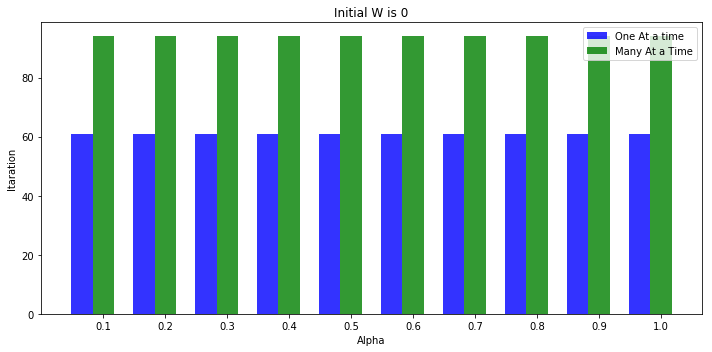

Case 3: Initial Weight Vector All Random :
   Learning Rate  One At a Time  Many At a Time
0            0.1            181             192
1            0.2             93             224
2            0.3             71             188
3            0.4             42             123
4            0.5             38             134
5            0.6             33              94
6            0.7             30             120
7            0.8             26              97
8            0.9             21             102
9            1.0             20              77


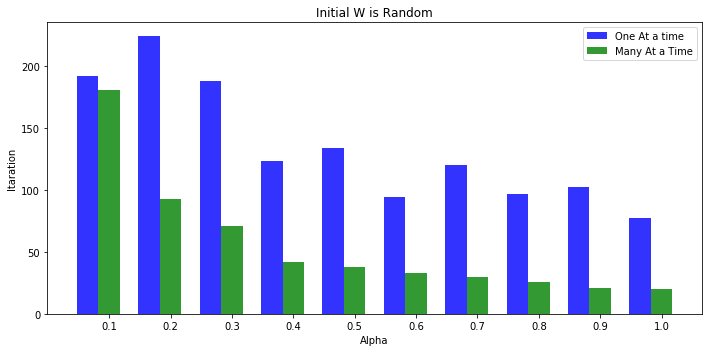

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline


def calculateY(data):
    
    list=[];
    for x1,x2,l in data:
        a=[];
        a.append(x1*x1);
        a.append(x2*x2);
        a.append(x1*x2);
        a.append(x1);
        a.append(x2);
        a.append(1);
        a.append(l);
        list.append(a);
        
    la=np.array(list,dtype=float);
#     print(la);
    return la;



data=pd.read_csv('train.txt',sep=' ',header=None,dtype='float');
data.columns = ['x','y','Label'];
df=data.groupby('Label');

data1=df.get_group(1);
# data1=data1.values;

data2=df.get_group(2);
# data2=data2.values;
plt.scatter(data1['x'],data1['y'],color='red',marker='o',label='Class 1');
plt.scatter(data2['x'],data2['y'],color='blue',marker='s',label='Class 2');
plt.title('Dataset')
plt.legend();

data=data.values;



y=calculateY(data);
print('Y:\n',y[:,0:6]);

# Normalization
for i in range(len(y)):
    row=y[i];
    if(row[len(row)-1]==2):
        y[i]=y[i]*(-1);
        
        
print('Normalized Y: \n',y[:,0:6]);


y=y[:,0:6]




alphas=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]);

# print('Many At a Time: ');
i1List=[];
for alpha in alphas:
    # all ones
 
    w=np.ones(6);
    sum=np.zeros(6);
    for i in range(500):
        flag=0;
        
        for Y in y:
            t=np.dot(Y,w);
            if t<=0:   #if misclassified
                sum=np.add(sum,Y);
                flag=1;
        w=np.add(w,alpha*sum);
        if flag==0 :
            break;
#     print('Alpha: ',alpha,' Iteration: ',i+1);
    i1List.append(i+1);
            
    
# print('One At a Time: ');
i2List=[];
for alpha in alphas:
    # all ones
    w=np.ones(6);
    
    for i in range(500):
        flag=0;

        for Y in y:
            t=np.dot(Y,w);
            if t<=0:   #if misclassified
                w=np.add(w,alpha*Y);
                flag=1;
        
        if flag==0 :
            break;
#     print('Alpha: ',alpha,' Iteration: ',i+1);
    i2List.append(i+1);
        
        
        
        
df = pd.DataFrame(columns=['Learning Rate','One At a Time','Many At a Time']);

df['Learning Rate']=alphas;
df['One At a Time']=i2List;
df['Many At a Time']=i1List;
print('Case 1: Initial Weight Vector All One :');

print(df);         
        
n_groups = 10;


plt.figure(figsize=(10,5));
index = np.arange(n_groups);
bar_width = 0.35;
opacity = 0.8;

plt.bar(index, i1List, bar_width,alpha=opacity,color='b',label='One At a time');

plt.bar(index + bar_width, i2List, bar_width,alpha=opacity,color='g',label='Many At a Time');

plt.xlabel('Alpha');
plt.ylabel('Itaration');
plt.title('Initial W is Ones');
plt.xticks(index + bar_width, alphas);
plt.legend();

plt.tight_layout();
plt.show()    ;

# All Zeros
    



# print('Many At a Time: ');
i1List=[];
for alpha in alphas:
    # all zeros
 
    w=np.zeros(6);
    sum=np.zeros(6);
    for i in range(500):
        flag=0;
        
        for Y in y:
            t=np.dot(Y,w);
            if t<=0:   #if misclassified
                sum=np.add(sum,Y);
                flag=1;
        w=np.add(w,alpha*sum);
        if flag==0 :
            break;
#     print('Alpha: ',alpha,' Iteration: ',i+1);
    i1List.append(i+1);
            
    
# print('One At a Time: ');
i2List=[];
for alpha in alphas:
    # all zeros
    w=np.zeros(6);
    
    for i in range(500):
        flag=0;

        for Y in y:
            t=np.dot(Y,w);
            if t<=0:   #if misclassified
                w=np.add(w,alpha*Y);
                flag=1;
        
        if flag==0 :
            break;
#     print('Alpha: ',alpha,' Iteration: ',i+1);
    i2List.append(i+1);
        
        
        
        
df = pd.DataFrame(columns=['Learning Rate','One At a Time','Many At a Time']);

df['Learning Rate']=alphas;
df['One At a Time']=i2List;
df['Many At a Time']=i1List;
print('Case 2: Initial Weight Vector All Zeros :');

print(df);         
        
n_groups = 10;


plt.figure(figsize=(10,5));
index = np.arange(n_groups);
bar_width = 0.35;
opacity = 0.8;

plt.bar(index, i1List, bar_width,alpha=opacity,color='b',label='One At a time');

plt.bar(index + bar_width, i2List, bar_width,alpha=opacity,color='g',label='Many At a Time');

plt.xlabel('Alpha');
plt.ylabel('Itaration');
plt.title('Initial W is 0');
plt.xticks(index + bar_width, alphas);
plt.legend();

plt.tight_layout();
plt.show()    ;

    

# Random

# print('Many At a Time: ');
i1List=[];
for alpha in alphas:
    # all random
    random.seed( 10 );
    my_randoms = random.sample(range(100), 6);
    
    w=np.array(my_randoms);
    sum=np.zeros(6);
    for i in range(500):
        flag=0;
        
        for Y in y:
            t=np.dot(Y,w);
            if t<=0:   #if misclassified
                sum=np.add(sum,Y);
                flag=1;
        w=np.add(w,alpha*sum);
        if flag==0 :
            break;
#     print('Alpha: ',alpha,' Iteration: ',i+1);
    i1List.append(i+1);
            
    
# print('One At a Time: ');
i2List=[];
for alpha in alphas:
     # all random
    random.seed( 10 );
    my_randoms = random.sample(range(100), 6);
    
    w=np.array(my_randoms);
    
    for i in range(500):
        flag=0;

        for Y in y:
            t=np.dot(Y,w);
            if t<=0:   #if misclassified
                w=np.add(w,alpha*Y);
                flag=1;
        
        if flag==0 :
            break;
#     print('Alpha: ',alpha,' Iteration: ',i+1);
    i2List.append(i+1);
        
        
        
        
df = pd.DataFrame(columns=['Learning Rate','One At a Time','Many At a Time']);

df['Learning Rate']=alphas;
df['One At a Time']=i2List;
df['Many At a Time']=i1List;
print('Case 3: Initial Weight Vector All Random :');

print(df);         
        
n_groups = 10;


plt.figure(figsize=(10,5));
index = np.arange(n_groups);
bar_width = 0.35;
opacity = 0.8;

plt.bar(index, i1List, bar_width,alpha=opacity,color='b',label='One At a time');

plt.bar(index + bar_width, i2List, bar_width,alpha=opacity,color='g',label='Many At a Time');

plt.xlabel('Alpha');
plt.ylabel('Itaration');
plt.title('Initial W is Random');
plt.xticks(index + bar_width, alphas);
plt.legend();

plt.tight_layout();
plt.show()    ;











In [20]:
a=[1, 2, 3];
b=[4,5,6];
print(np.zeros(6));

[0. 0. 0. 0. 0. 0.]
